<a href="https://colab.research.google.com/github/noprisigit/DenseNet121/blob/main/DenseNet121%20-%20128%20Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Cervical Lesion Classification with ResNet50 in Google Colab

## Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Step 2: Extract ZIP Dataset from Google Drive
import zipfile
import os

# zip_path = '/content/drive/MyDrive/dataset-swedesh-score.zip'  # Ganti path ini sesuai lokasi ZIP Anda
# extract_path = '/content/dataset-swedesh-score'

# if not os.path.exists(extract_path):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("Dataset extracted successfully.")
# else:
#     print("Dataset already extracted.")
!unzip '/content/drive/MyDrive/dataset-swedesh-score.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug103.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug104.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug105.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug106.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug107.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug108.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug109.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug11.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug110.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug111.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug112.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug113.jpg  
  inflating: dataset-swedesh-score/train/Normal/C1Aceto (1)_aug114.jpg  
 

In [42]:
## Step 3: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

## Step 4: Define Paths and Parameters
data_dir = '/content/dataset-swedesh-score'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
img_size = (128, 128)
batch_size = 64
n_classes = 4
class_names = ['Normal', 'CIN 1', 'CIN 2', 'CIN 3']

In [43]:
## Step 5: Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 29221 images belonging to 4 classes.
Found 166 images belonging to 4 classes.


In [47]:
## Step 6: Build Model with Pretrained
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, decay=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
## Step 7: Train Model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 151s 147ms/step - accuracy: 0.5340 - loss: 1.1086 - val_accuracy: 0.4458 - val_loss: 1.3046
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.7993 - loss: 0.5906 - val_accuracy: 0.4458 - val_loss: 1.4278
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.8680 - loss: 0.4151 - val_accuracy: 0.4699 - val_loss: 1.4315
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step - accuracy: 0.9050 - loss: 0.3192 - val_accuracy: 0.4940 - val_loss: 1.4914
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9240 - loss: 0.2551 - val_accuracy: 0.5060 - val_loss: 1.4810
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9335 - loss: 0.2186 - val_accuracy: 0.5422 - val_loss: 1.5067
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9400 - loss: 0.1910 - val_accuracy: 0.5482 - val_loss: 1.6019
Epoch 8/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.9486 - loss:

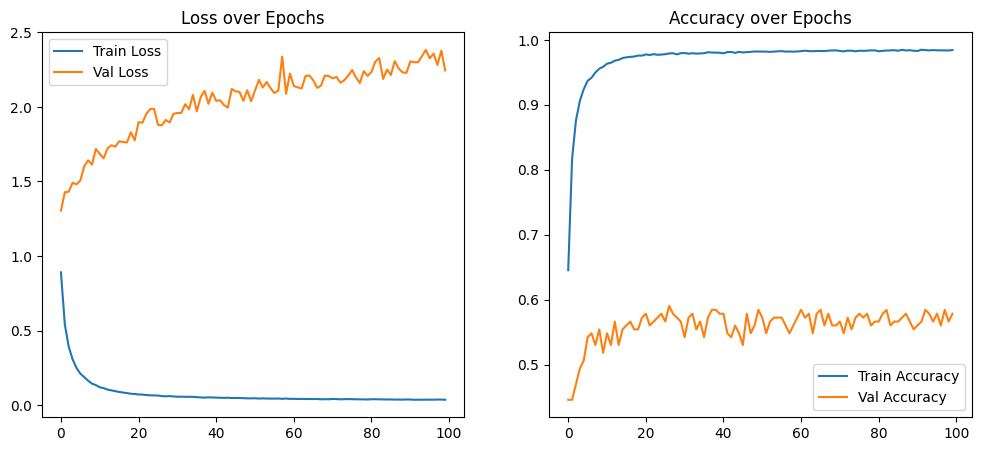

In [49]:
## Step 8: Plot Loss and Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step


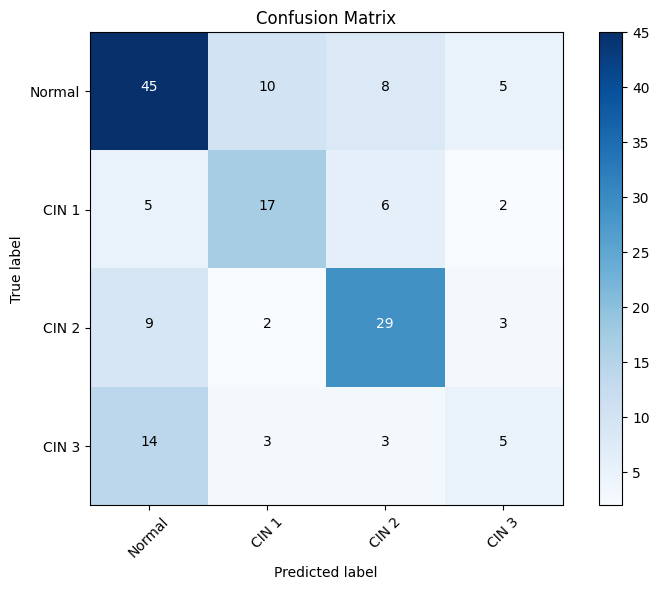

              precision    recall  f1-score   support

      Normal       0.62      0.66      0.64        68
       CIN 1       0.53      0.57      0.55        30
       CIN 2       0.63      0.67      0.65        43
       CIN 3       0.33      0.20      0.25        25

    accuracy                           0.58       166
   macro avg       0.53      0.53      0.52       166
weighted avg       0.56      0.58      0.57       166



In [50]:
## Step 9: Confusion Matrix and Classification Report
# Predict
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

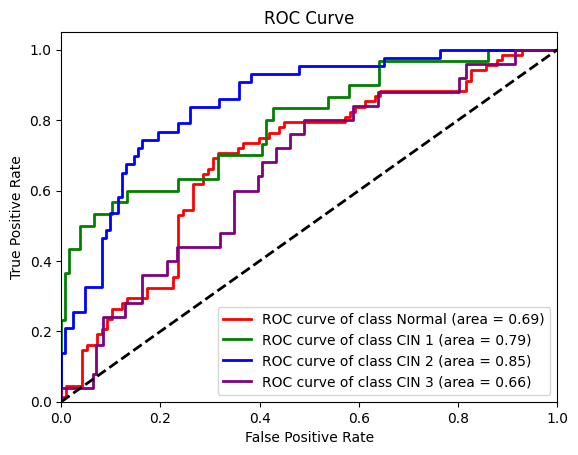

In [51]:
## Step 10: ROC Curve
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
colors = ['red', 'green', 'blue', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()